## 数据类型
首先我们来介绍TensorFlow 中的基本数据类型，它包含了数值型、字符串型和布尔型。
### 数值类型
❑ 标量(Scalar) 单个的实数，如1.2, 3.4 等，维度数(Dimension，也叫秩)为0，shape 为[]<br>
❑ 向量(Vector) n 个实数的有序集合，通过中括号包裹，如[1.2]，[1.2, 3.4]等，维度数为
1，长度不定，shape 为[𝑛]<br>
❑ 矩阵(Matrix) n 行m 列实数的有序集合，如[[1,2], [3,4]

维度数为2，每个维度上的长度不定，shape 为[𝑛, 𝑚]
❑ 张量(Tensor) 所有维度数dim > 2的数组统称为张量。张量的每个维度也做轴(Axis)，
一般维度代表了具体的物理含义，比如Shape 为[2,32,32,3]的张量共有4 维，如果表
示图片数据的话，每个维度/轴代表的含义分别是：图片数量、图片高度、图片宽度、
图片通道数，其中2 代表了2 张图片，32 代表了高宽均为32，3 代表了RGB 3 个通
道。张量的维度数以及每个维度所代表的具体物理含义需要由用户自行定义
在 TensorFlow 中间，为了表达方便，一般把标量、向量、矩阵也统称为张量，不作区
分，需要根据张量的维度数和形状自行判断。
首先来看标量在TensorFlow 是如何创建的：

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
a = 1.2
aa = tf.constant(1.2)# 创建标量
type(a), type(aa), tf.is_tensor(aa)

(float, tensorflow.python.framework.ops.EagerTensor, True)

In [3]:
x = tf.constant([1,2.,3.3])
x

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1. , 2. , 3.3], dtype=float32)>

In [4]:
x.numpy()

array([1. , 2. , 3.3], dtype=float32)

与标量不同，向量的定义须通过List 类型传给tf.constant()。创建一个元素的向量：

In [5]:
a = tf.constant([1.2])
a, a.shape

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.2], dtype=float32)>,
 TensorShape([1]))

In [6]:
a = tf.constant([1,2, 3.])
a, a.shape

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>,
 TensorShape([3]))

同样的方法定义矩阵

In [7]:
a = tf.constant([[1,2],[3,4]])
a, a.shape

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4]])>, TensorShape([2, 2]))

3维张量可以定义为：

In [8]:
a= tf.constant([[[1,2],[3,4]],[[5,6],[7,8]]])
a

<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])>

### 字符串类型
除了丰富的数值类型外，TensorFlow 还支持字符串(String)类型的数据，例如在表示图
片数据时，可以先记录图片的路径，再通过预处理函数根据路径读取图片张量。通过传入
字符串对象即可创建字符串类型的张量：

In [9]:
a = tf.constant('Hello, Deep Learning.')
a

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>

在tf.strings 模块中，提供了常见的字符串型的工具函数，如拼接join()，长度length()，切
分split()等等

In [10]:
tf.strings.lower(a)

<tf.Tensor: shape=(), dtype=string, numpy=b'hello, deep learning.'>

深度学习算法主要还是以数值类型张量运算为主，字符串类型的数据使用频率较低，
我们不做过多阐述。

### 布尔类型
为了方便表达比较运算操作的结果，TensorFlow 还支持布尔类型(Boolean, bool)的张
量。布尔类型的张量只需要传入Python 语言的布尔类型数据，转换成TensorFlow 内部布
尔型即可：

In [11]:
a = tf.constant(True)
a

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [12]:
a= tf.constant([True, False])
a

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

需要注意的是，TensorFlow 的布尔类型和Python 语言的布尔类型并不对等，不能通用：

In [13]:
a = tf.constant(True)
a == True

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## 数值精度
对于数值类型的张量，可以保持为不同字节长度的精度，如浮点数3.14 既可以保存为
16-bit 长度，也可以保存为32-bit 甚至64-bit 的精度。Bit 位越长，精度越高，同时占用的
内存空间也就越大。常用的精度类型有tf.int16, tf.int32, tf.int64, tf.float16, tf.float32,
tf.float64，其中tf.float64 即为tf.double。
在创建张量时，可以指定张量的保存精度：

In [14]:
a = tf.constant(123456789, dtype=tf.int16)
b = tf.constant(123456789, dtype=tf.int32)
a, b

(<tf.Tensor: shape=(), dtype=int16, numpy=-13035>,
 <tf.Tensor: shape=(), dtype=int32, numpy=123456789>)

可以看到，保存精度过低时，数据123456789 发生了溢出，得到了错误的结果，一般使用
tf.int32, tf.int64 精度。对于浮点数，高精度的张量可以表示更精准的数据，例如采用
tf.float32 精度保存𝜋时：

In [15]:
import numpy as np
print(np.pi)
tf.constant(np.pi, dtype=tf.float32)

3.141592653589793


<tf.Tensor: shape=(), dtype=float32, numpy=3.1415927>

如果采用tf.float64 精度保存𝜋，则能获得更高的精度：

In [16]:
tf.constant(np.pi, dtype=tf.float64)

<tf.Tensor: shape=(), dtype=float64, numpy=3.141592653589793>

### 读取精度
通过访问张量的dtype 成员属性可以判断张量的保存精度：

In [17]:
print('before:',a.dtype)
if a.dtype != tf.float32:
    a = tf.cast(a,tf.float32) # 转换精度
print('after :',a.dtype)

before: <dtype: 'int16'>
after : <dtype: 'float32'>


对于某些只能处理指定精度类型的运算操作，需要提前检验输入张量的精度类型，并将不符合要求的张量进行类型转换。

### 类型转换
系统的每个模块使用的数据类型、数值精度可能各不相同，对于不符合要求的张量的
类型及精度，需要通过tf.cast 函数进行转换：

In [18]:
a = tf.constant(np.pi, dtype=tf.float16)
tf.cast(a, tf.double)

<tf.Tensor: shape=(), dtype=float64, numpy=3.140625>

进行类型转换时，需要保证转换操作的合法性，例如将高精度的张量转换为低精度的张量
时，可能发生数据溢出隐患：

In [19]:
a = tf.constant(123456789, dtype=tf.int32)
tf.cast(a, tf.int16)

<tf.Tensor: shape=(), dtype=int16, numpy=-13035>

布尔型与整形之间相互转换也是合法的，是比较常见的操作：

In [20]:
a =  tf.constant([True, False])
tf.cast(a, tf.int32)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 0])>

一般默认0 表示False，1 表示True，在TensorFlow 中，将非0 数字都视为True:

In [21]:
a = tf.constant([-1, 0, 1, 2])
tf.cast(a, tf.bool)

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True, False,  True,  True])>

## 待优化张量
为了区分需要计算梯度信息的张量与不需要计算梯度信息的张量，TensorFlow 增加了
一种专门的数据类型来支持梯度信息的记录：tf.Variable。tf.Variable 类型在普通的张量类
型基础上添加了name，trainable 等属性来支持计算图的构建。由于梯度运算会消耗大量的
计算资源，而且会自动更新相关参数，对于不需要的优化的张量，如神经网络的输入X，
不需要通过tf.Variable 封装；相反，对于需要计算梯度并优化的张量，如神经网络层的W
和𝒃，需要通过tf.Variable 包裹以便TensorFlow 跟踪相关梯度信息。
通过 tf.Variable()函数可以将普通张量转换为待优化张量：

In [22]:
a = tf.constant([-1, 0, 1, 2])
aa = tf.Variable(a)
aa.name, aa.trainable

('Variable:0', True)

其中张量的name 和trainable 属性是Variable 特有的属性，name 属性用于命名计算图中的
变量，这套命名体系是TensorFlow 内部维护的，一般不需要用户关注name 属性；trainable
表征当前张量是否需要被优化，创建Variable 对象是默认启用优化标志，可以设置
trainable=False 来设置张量不需要优化<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;除了通过普通张量方式创建Variable，也可以直接创建：

In [23]:
a = tf.Variable([[1,2],[3,4]])
a

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

待优化张量可看做普通张量的特殊类型，普通张量也可以通过GradientTape.watch()方法临
时加入跟踪梯度信息的列表。

## 创建张量
在 TensorFlow 中，可以通过多种方式创建张量，如从Python List 对象创建，从
Numpy 数组创建，或者创建采样自某种已知分布的张量等。
### 从 Numpy, List 对象创建
Numpy Array 数组和Python List 是Python 程序中间非常重要的数据载体容器，很多数
据都是通过Python 语言将数据加载至Array 或者List 容器，再转换到Tensor 类型，通过
TensorFlow 运算处理后导出到Array 或者List 容器，方便其他模块调用。
通过 tf.convert_to_tensor 可以创建新Tensor，并将保存在Python List 对象或者Numpy
Array 对象中的数据导入到新Tensor 中：

In [24]:
tf.convert_to_tensor([1,2.])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [25]:
tf.convert_to_tensor(np.array([[1,2.],[3,4]]))

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1., 2.],
       [3., 4.]])>

In [26]:
tf.constant(np.array([[1,2.],[3,4]]))

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1., 2.],
       [3., 4.]])>

需要注意的是，Numpy 中浮点数数组默认使用64-Bit 精度保存数据，转换到Tensor 类型时
精度为tf.float64，可以在需要的时候转换为tf.float32 类型

实际上，tf.constant()和tf.convert_to_tensor()都能够自动的把Numpy 数组或者Python
List 数据类型转化为Tensor 类型，这两个API 命名来自TensorFlow 1.x 的命名习惯，在
TensorFlow 2 中函数的名字并不是很贴切，使用其一即可

### 创建全0，全1 张量
将张量创建为全0 或者全1 数据是非常常见的张量初始化手段。考虑线性变换
𝒚 = 𝑊𝒙 + 𝒃，将权值矩阵W 初始化为全1 矩阵，偏置b 初始化为全0 向量，此时线性变
化层输出𝒚 = 𝒙，是一种比较好的层初始化状态。通过tf.zeros()和tf.ones()即可创建任意形
状全0 或全1 的张量。例如，创建为0 和为1 的标量张量：

In [27]:
tf.zeros([]),tf.ones([])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

创建全0 和全1 的向量：

In [28]:
tf.zeros([1]),tf.ones([1])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)

创建全0 的矩阵：

In [29]:
tf.zeros([2,2])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

创建全1 的矩阵：

In [30]:
tf.ones([3,2])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

通过tf.zeros_like, tf.ones_like 可以方便地新建与某个张量shape 一致，内容全0 或全1
的张量。例如，创建与张量a 形状一样的全0 张量：

In [31]:
a = tf.ones([2,3])
tf.zeros_like(a)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

创建与张量a 形状一样的全1 张量

In [32]:
a = tf.zeros([3,2])
tf.zeros_like(a)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [33]:
tf.ones_like(a)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

tf.*_like 是一个便捷函数，可以通过tf.zeros(a.shape)等方式实现。

In [34]:
tf.zeros(a.shape)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

### 创建自定义数值张量

In [35]:
tf.fill([], -1)

<tf.Tensor: shape=(), dtype=int32, numpy=-1>

In [36]:
# 创建所有元素为99 的矩阵：
tf.fill([2,2], 99)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[99, 99],
       [99, 99]])>

### 创建已知分布的张量
　　正态分布(Normal Distribution，或Gaussian Distribution)和均匀分布(Uniform
Distribution)是最常见的分布之一，创建采样自这2 种分布的张量非常有用，比如在卷积神
经网络中，卷积核张量W 初始化为正态分布有利于网络的训练；在对抗生成网络中，隐藏
变量z 一般采样自均匀分布。<br>
　　通过 tf.random.normal(shape, mean=0.0, stddev=1.0)可以创建形状为shape，均值为
mean，标准差为stddev 的正态分布𝒩(𝑚𝑒𝑎𝑛, 𝑠𝑡𝑑𝑑𝑒𝑣2)。例如，创建均值为0，标准差为1
的正太分布：

In [37]:
tf.random.normal([2,2])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.21667098,  0.64700776],
       [-0.6119855 , -0.20462865]], dtype=float32)>

创建均值为1，标准差为2 的正太分布：

In [38]:
tf.random.normal([2,2], mean=1,stddev=2)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.08730149, -1.3141754 ],
       [-0.5105175 ,  3.1544025 ]], dtype=float32)>

　　通过tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.float32)可以创建采样自
[𝑚𝑖𝑛𝑣𝑎𝑙, 𝑚𝑎𝑥𝑣𝑎𝑙]区间的均匀分布的张量。例如创建采样自区间[0,1]，shape 为[2,2]的矩
阵：

In [39]:
tf.random.uniform([2,2])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.24095058, 0.15300834],
       [0.6511147 , 0.62533784]], dtype=float32)>

创建采样自区间[0,10]，shape 为[2,2]的矩阵：

In [40]:
tf.random.uniform([2,2],minval=0,maxval=10)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4.9768534, 8.640963 ],
       [1.1083424, 4.369706 ]], dtype=float32)>

如果需要均匀采样整形类型的数据，必须指定采样区间的最大值maxval 参数，同时制定数
据类型为tf.int*型：

In [41]:
tf.random.uniform([2,2],maxval=100,dtype=tf.int32)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 1, 64],
       [91, 11]])>

### 创建序列
在循环计算或者对张量进行索引时，经常需要创建一段连续的整形序列，可以通过
tf.range()函数实现。tf.range(limit, delta=1)可以创建[0, 𝑙𝑖𝑚𝑖𝑡)之间，步长为delta 的整形序
列，不包含limit 本身。例如，创建0~9，步长为1 的整形序列：

In [42]:
tf.range(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

创建0~9，步长为2 的整形序列：

In [43]:
tf.range(10,delta=2)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 2, 4, 6, 8])>

通过tf.range(start, limit, delta=1)可以创建[𝑠𝑡𝑎𝑟𝑡, 𝑙𝑖𝑚𝑖𝑡)，步长为delta 的序列，不包含limit
本身：

In [44]:
tf.range(1,10,delta=2)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 3, 5, 7, 9])>

## 张量的典型应用
在介绍完张量的相关属性和创建方式后，我们将介绍每种维度下张量的典型应用，让
读者在看到每种张量时，能够直观地联想到它主要的物理意义和用途，对后续张量的维度
变换等一系列抽象操作的学习打下基础。
本节在介绍典型应用时不可避免地会提及后续将要学习的网络模型或算法，学习时不
需要完全理解，有初步印象即可。
### 标量
在 TensorFlow 中，标量最容易理解，它就是一个简单的数字，维度数为0，shape 为
[]。标量的典型用途之一是误差值的表示、各种测量指标的表示，比如准确度(Accuracy,
acc)，精度(Precision)和召回率(Recall)等。
考虑某个模型的训练曲线，如图 4.1 所示，横坐标为训练Batch 步数Step，纵坐标分
别为误差变化趋势(图 4.1(a))和准确度变化趋势曲线(图 4.1(b))，其中损失值loss 和准确度
均由张量计算产生，类型为标量。

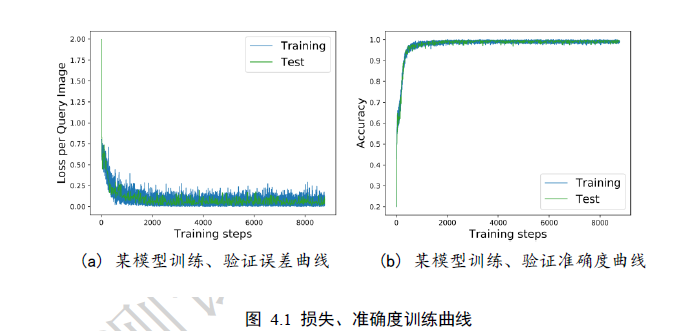

以均方差误差函数为例，经过tf.keras.losses.mse(或tf.keras.losses.MSE)返回每个样本
上的误差值，最后取误差的均值作为当前batch 的误差，它是一个标量：

In [45]:
out = tf.random.uniform([4,10]) #随机模拟网络输出
y = tf.constant([2,3,2,0]) # 随机构造样本真实标签
y = tf.one_hot(y, depth=10) # one-hot 编码
loss = tf.keras.losses.mse(y, out) # 计算每个样本的MSE
loss = tf.reduce_mean(loss) # 平均MSE
print(loss)

tf.Tensor(0.2942667, shape=(), dtype=float32)


### 向量
向量是一种非常常见的数据载体，如在全连接层和卷积神经网络层中，偏置张量𝒃就
使用向量来表示。如图 4.2 所示，每个全连接层的输出节点都添加了一个偏置值，把所有
输出节点的偏置表示成向量形式：𝒃 = [𝑏1, 𝑏2]𝑇。
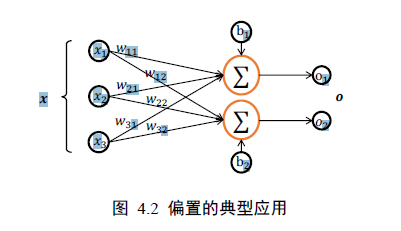

考虑 2 个输出节点的网络层，我们创建长度为2 的偏置向量𝒃，并累加在每个输出节点
上：

In [46]:
# z=wx,模拟获得激活函数的输入z
z = tf.random.normal([4,2])
b = tf.zeros([2])
z = z + b
z

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[ 0.21299724, -0.03637211],
       [ 1.1498016 ,  0.7193538 ],
       [-0.9196144 ,  0.31134793],
       [ 0.6982715 , -1.4799693 ]], dtype=float32)>

注意到这里shape 为[4,2]的𝒛和shape 为[2]的𝒃张量可以直接相加，这是为什么呢？让我们
在Broadcasting 一节为大家揭秘。
通过高层接口类Dense()方式创建的网络层，张量W 和𝒃存储在类的内部，由类自动创
建并管理。可以通过全连接层的bias 成员变量查看偏置变量𝒃，例如创建输入节点数为4，
输出节点数为3 的线性层网络，那么它的偏置向量b 的长度应为3：

In [47]:
fc = tf.keras.layers.Dense(3) # 创建一层Wx+b，输出节点为3
# 通过build 函数创建W,b 张量，输入节点为4
fc.build(input_shape=(2,4))
fc.bias # 查看偏置

<tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

可以看到，类的偏置成员bias 初始化为全0，这也是偏置𝒃的默认初始化方案。

### 矩阵
矩阵也是非常常见的张量类型，比如全连接层的批量输入𝑋 = [𝑏, 𝑑𝑖𝑛 ]，其中𝑏表示输入
样本的个数，即batch size，𝑑𝑖𝑛表示输入特征的长度。比如特征长度为4，一共包含2 个样
本的输入可以表示为矩阵：

In [48]:
x = tf.random.normal([2,4])

令全连接层的输出节点数为3，则它的权值张量W 的shape 为[4,3]:

In [49]:
w = tf.ones([4,3]) # 定义W 张量
b = tf.zeros([3]) # 定义b 张量
o = x@w+b # X@W+b 运算
o

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1.1857171, 1.1857171, 1.1857171],
       [1.5577728, 1.5577728, 1.5577728]], dtype=float32)>

其中X，W 张量均是矩阵。x@w+b 网络层称为线性层，在TensorFlow 中可以通过Dense
类直接实现，Dense 层也称为全连接层。我们通过Dense 类创建输入4 个节点，输出3 个
节点的网络层，可以通过全连接层的kernel 成员名查看其权值矩阵W：

In [50]:
fc = tf.keras.layers.Dense(3) # 定义全连接层的输出节点为3
fc.build(input_shape=(2,4)) # 定义全连接层的输入节点为4
fc.kernel

<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.6253276 ,  0.80866754,  0.9039588 ],
       [-0.84115124, -0.34918725, -0.7608897 ],
       [-0.850164  ,  0.2825557 , -0.63162625],
       [ 0.11829579, -0.7260023 , -0.4400258 ]], dtype=float32)>

### 3维张量

　　三维的张量一个典型应用是表示序列信号，它的格式是
𝑋 = [𝑏, 𝑠𝑒𝑞𝑢𝑒𝑛𝑐𝑒 𝑙𝑒𝑛, 𝑓𝑒𝑎𝑡𝑢𝑟𝑒 𝑙𝑒𝑛]
其中𝑏表示序列信号的数量，sequence len 表示序列信号在时间维度上的采样点数，feature
len 表示每个点的特征长度。<br>
　 考虑自然语言处理中句子的表示，如评价句子的是否为正面情绪的情感分类任务网
络，如图 4.3 所示。
(Embedding Layer)编码为固定长度的向量，比如“a”编码为某个长度3 的向量，那么2 个
等长(单词数为5)的句子序列可以表示为shape 为[2,5,3]的3 维张量，其中2 表示句子个
数，5 表示单词数量，3 表示单词向量的长度：

In [199]:
# 自动加载IMDB 电影评价数据集
# (train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)
import os 
imdb_path = os.path.join(os.getcwd(),'data/imdb.npz')
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.imdb.load_data(path=imdb_path,num_words=10000)

In [52]:
# 将句子填充、截断为等长80 个单词的句子
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,maxlen=80)
x_train.shape

(25000, 80)

可以看到x_train 张量的shape 为[25000,80]，其中25000 表示句子个数，80 表示每个句子
共80 个单词，每个单词使用数字编码方式。我们通过layers.Embedding 层将数字编码的单
词转换为长度为100 个词向量：

In [53]:
In [47]: # 创建词向量Embedding 层类
embedding=tf.keras.layers.Embedding(10000, 100)
# 将数字编码的单词转换为词向量
out = embedding(x_train)
out.shape

TensorShape([25000, 80, 100])

可以看到，经过Embedding 层编码后，句子张量的shape 变为[25000,80,100]，其中100 表
示每个单词编码为长度100 的向量。
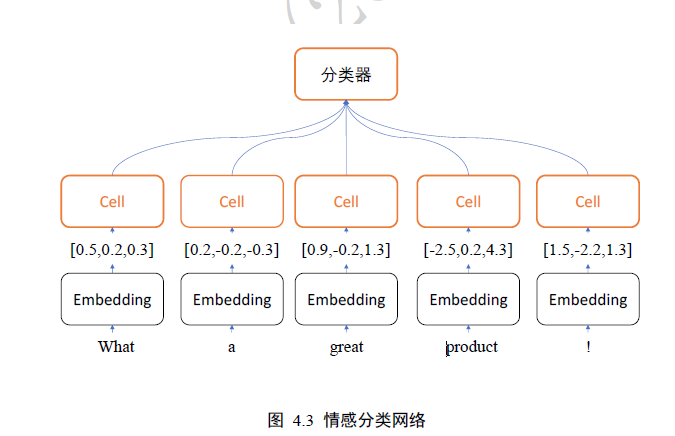
　　对于特征长度为1 的序列信号，比如商品价格在60 天内的变化曲线，只需要一个标量
即可表示商品的价格，因此2 件商品的价格变化趋势可以使用shape 为[2,60]的张量表示。
为了方便统一格式，也将价格变化趋势表达为shape 为 [2,60,1]的张量，其中的1 表示特
征长度为1。

### 4 维张量
我们这里只讨论3/4 维张量，大于4 维的张量一般应用的比较少，如在元学习(meta
learning)中会采用5 维的张量表示方法，理解方法与3/4 维张量类似。<br>
　　4 维张量在卷积神经网络中应用的非常广泛，它用于保存特征图(Feature maps)数据，
格式一般定义为<br>
[𝑏, ℎ, , 𝑐]
其中𝑏表示输入的数量，h/w分布表示特征图的高宽，𝑐表示特征图的通道数，部分深度学
习框架也会使用[𝑏, 𝑐, ℎ, ]格式的特征图张量，例如PyTorch。图片数据是特征图的一种，
对于含有RGB 3 个通道的彩色图片，每张图片包含了h 行w 列像素点，每个点需要3 个数
值表示RGB 通道的颜色强度，因此一张图片可以表示为[h, w, 3]。如图 4.4 所示，最上层
的图片表示原图，它包含了下面3 个通道的强度信息。
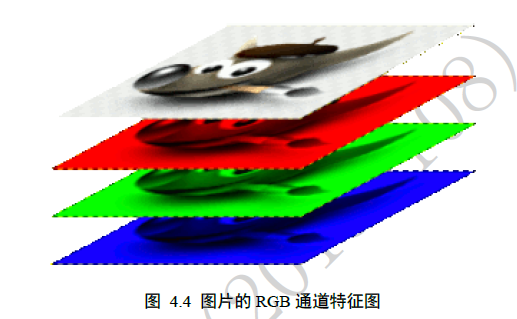
神经网络中一般并行计算多个输入以提高计算效率，故𝑏张图片的张量可表示为
[𝑏, ℎ, , 3]。

In [54]:
# 创建32x32 的彩色图片输入，个数为4
x = tf.random.normal([4,32,32,3])
# 创建卷积神经网络
layer = tf.keras.layers.Conv2D(16,kernel_size=3)
out = layer(x) # 前向计算
out.shape # 输出大小

TensorShape([4, 30, 30, 16])

其中卷积核张量也是4 维张量，可以通过kernel 成员变量访问：

In [55]:
layer.kernel.shape

TensorShape([3, 3, 3, 16])

## 索引与切片 
　　通过索引与切片操作可以提取张量的部分数据，使用频率非常高。 
### 索引 
　　在 TensorFlow 中，支持基本的[𝑖][𝑗]…标准索引方式，也支持通过逗号分隔索引号的索 引方式。考虑输入 X 为 4 张 32x32 大小的彩色图片(为了方便演示，大部分张量都使用随 即分布模拟产生，后文同)，shape 为[4,32,32,3]，首先创建张量： 

In [56]:
x = tf.random.normal([4,32,32,3])

接下来我们使用索引方式读取张量的部分数据。<br>
❑ 取第 1 张图片的数据：

In [57]:
 x[0] 

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[-0.60409343,  0.7494589 , -1.3016175 ],
        [-1.311333  , -0.09267387,  0.90817964],
        [-0.08417185,  1.5414238 ,  1.1088278 ],
        ...,
        [ 0.77754605, -0.3419324 ,  1.1182157 ],
        [ 0.12815267, -0.25338468,  0.07607091],
        [ 1.4774792 ,  1.1596192 ,  1.175543  ]],

       [[-2.708911  ,  0.11230481,  1.9939643 ],
        [-0.65796   ,  0.19377403, -0.3118673 ],
        [-1.5734714 ,  0.2203791 ,  0.7400683 ],
        ...,
        [-1.6669254 ,  0.6138065 ,  0.9731239 ],
        [ 0.26826918, -0.19601361,  0.6069821 ],
        [-0.15174009, -0.46609232,  0.17627689]],

       [[-0.5377451 , -0.43776968, -1.363254  ],
        [ 1.3458732 ,  0.693593  ,  0.9253883 ],
        [-0.18133003,  1.4487412 , -1.0368441 ],
        ...,
        [ 0.25322506,  1.5126544 ,  0.0250041 ],
        [-0.16411218,  2.011648  ,  1.8957273 ],
        [-0.24055347, -0.96940017, -0.16734515]],

       ...,

       

❑ 取第 1 张图片的第 2 行： 

In [58]:
 x[0][1] 

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[-2.708911  ,  0.11230481,  1.9939643 ],
       [-0.65796   ,  0.19377403, -0.3118673 ],
       [-1.5734714 ,  0.2203791 ,  0.7400683 ],
       [ 0.5603791 , -0.45854896, -2.676518  ],
       [-1.19147   ,  0.7805217 ,  0.13454081],
       [ 0.9908148 ,  0.14909418,  0.15673667],
       [ 1.6733148 , -0.7649204 , -0.5866256 ],
       [ 0.19883987,  1.1684422 , -1.9361699 ],
       [ 0.05306564,  1.3873166 ,  0.90131235],
       [ 0.5113096 , -1.6059862 , -0.81877357],
       [ 0.21107572, -1.2731586 , -0.07895619],
       [ 0.34177157, -0.17155467, -1.1391511 ],
       [-1.5160134 ,  0.78903717, -1.2983015 ],
       [-0.07985944,  0.7973627 ,  1.5742861 ],
       [-0.90912384, -0.35365322,  0.6125726 ],
       [ 0.52325904, -0.45856333, -0.5585195 ],
       [ 0.86278915,  0.5504827 , -0.41286528],
       [-0.6169309 ,  0.9242903 ,  0.179037  ],
       [ 0.4091619 ,  0.829788  , -0.88513106],
       [ 0.11014918,  1.212094  ,  1.08

❑ 取第 1 张图片，第 2 行，第 3 列的像素

In [59]:
x[0][1][2]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.5734714,  0.2203791,  0.7400683], dtype=float32)>

❑ 取第 3 张图片，第 2 行，第 1 列的像素，B 通道(第 2 个通道)颜色强度值： 

In [60]:
 x[2][1][0][1] 

<tf.Tensor: shape=(), dtype=float32, numpy=1.6206913>

In [61]:
 x[1,9,2] 

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.1336077 ,  0.93391305, -2.7429478 ], dtype=float32)>

当张量的维度数较高时，使用[𝑖][𝑗]...[𝑘]的方式书写不方便，可以采用[𝑖,𝑗,…,𝑘]的方 式索引，它们是等价的

### 切片 
　　通过𝑠𝑡𝑎𝑟𝑡:𝑒𝑛𝑑:𝑠𝑡𝑒𝑝切片方式可以方便地提取一段数据，其中 start 为开始读取位置的 索引，end 为结束读取位置的索引(不包含 end 位)，step 为读取步长。 <br>
　　以 shape 为[4,32,32,3]的图片张量为例：<br> ❑ 读取第 2,3 张图片： 

In [62]:
 x[1:3] 

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[-1.1105665 ,  1.2075013 ,  1.1878016 ],
         [ 1.045278  , -2.2454486 , -1.3166254 ],
         [-0.7563527 ,  1.0504545 ,  0.36379042],
         ...,
         [ 1.6640589 , -1.4568262 , -0.7981774 ],
         [-0.34264854,  1.1101885 , -0.28613722],
         [-1.4196168 ,  0.27347237,  0.92079246]],

        [[-0.29730666,  0.6956707 ,  0.6900567 ],
         [ 0.34069136,  2.9530673 , -0.8010346 ],
         [-2.3960652 , -1.8779653 ,  0.5240079 ],
         ...,
         [ 0.13323908,  0.41893417,  0.6641496 ],
         [ 1.2589456 , -1.4052458 ,  0.28767973],
         [ 0.13116008,  1.5296303 , -0.33865997]],

        [[-1.1912054 ,  0.7214299 , -0.04665057],
         [-0.7323598 ,  0.93503284, -0.60387564],
         [-0.07407667,  0.6325085 ,  2.1503248 ],
         ...,
         [ 0.10331625,  0.29676265, -0.12865467],
         [ 1.5739927 , -0.27144405, -0.7351278 ],
         [ 1.5976661 ,  1.8492175 , -1.189319  ]

　　start:end:step切片方式有很多简写方式，其中 start、end、step 3 个参数可以根据需要 选择性地省略，全部省略时即::，表示从最开始读取到最末尾，步长为 1，即不跳过任何元 素。如 x[0,::]表示读取第 1 张图片的所有行，其中::表示在行维度上读取所有行，它等于 x[0]的写法：

In [63]:
 x[0,::] 

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[-0.60409343,  0.7494589 , -1.3016175 ],
        [-1.311333  , -0.09267387,  0.90817964],
        [-0.08417185,  1.5414238 ,  1.1088278 ],
        ...,
        [ 0.77754605, -0.3419324 ,  1.1182157 ],
        [ 0.12815267, -0.25338468,  0.07607091],
        [ 1.4774792 ,  1.1596192 ,  1.175543  ]],

       [[-2.708911  ,  0.11230481,  1.9939643 ],
        [-0.65796   ,  0.19377403, -0.3118673 ],
        [-1.5734714 ,  0.2203791 ,  0.7400683 ],
        ...,
        [-1.6669254 ,  0.6138065 ,  0.9731239 ],
        [ 0.26826918, -0.19601361,  0.6069821 ],
        [-0.15174009, -0.46609232,  0.17627689]],

       [[-0.5377451 , -0.43776968, -1.363254  ],
        [ 1.3458732 ,  0.693593  ,  0.9253883 ],
        [-0.18133003,  1.4487412 , -1.0368441 ],
        ...,
        [ 0.25322506,  1.5126544 ,  0.0250041 ],
        [-0.16411218,  2.011648  ,  1.8957273 ],
        [-0.24055347, -0.96940017, -0.16734515]],

       ...,

       

为了更加简洁，::可以简写为单个冒号:，如 

In [64]:
 x[:,0:28:2,0:28:2,:] 

<tf.Tensor: shape=(4, 14, 14, 3), dtype=float32, numpy=
array([[[[-6.04093432e-01,  7.49458909e-01, -1.30161750e+00],
         [-8.41718540e-02,  1.54142380e+00,  1.10882783e+00],
         [-1.20805740e+00, -7.61579037e-01, -2.48293914e-02],
         ...,
         [-4.81143624e-01, -5.82845472e-02,  1.47928759e-01],
         [-1.79018581e+00,  1.27410698e+00,  4.50726151e-01],
         [ 9.82417911e-02,  3.32508057e-01, -7.93738306e-01]],

        [[-5.37745118e-01, -4.37769681e-01, -1.36325395e+00],
         [-1.81330025e-01,  1.44874120e+00, -1.03684413e+00],
         [ 1.66176379e+00, -3.06978166e-01, -4.18285221e-01],
         ...,
         [ 1.36393702e+00, -1.56503260e+00,  5.24070501e-01],
         [-2.67776906e-01,  1.27771586e-01, -2.16185242e-01],
         [ 9.30109203e-01, -1.47817957e+00,  3.91368985e-01]],

        [[ 2.47506356e+00, -6.52621329e-01,  1.01082981e+00],
         [ 1.33635116e+00,  1.85776508e+00, -6.54747963e-01],
         [ 8.72618556e-02,  9.80600178e-01, 

表示取所有图片，隔行采样，隔列采样，所有通道信息，相当于在图片的高宽各缩放至原 来的 50%。 

　　我们来总结start:end:step切片的简写方式，其中从第一个元素读取时 start 可以省略， 即 start=0 是可以省略，取到最后一个元素时 end 可以省略，步长为 1 时 step 可以省略，简 写方式总结如表格 4.1：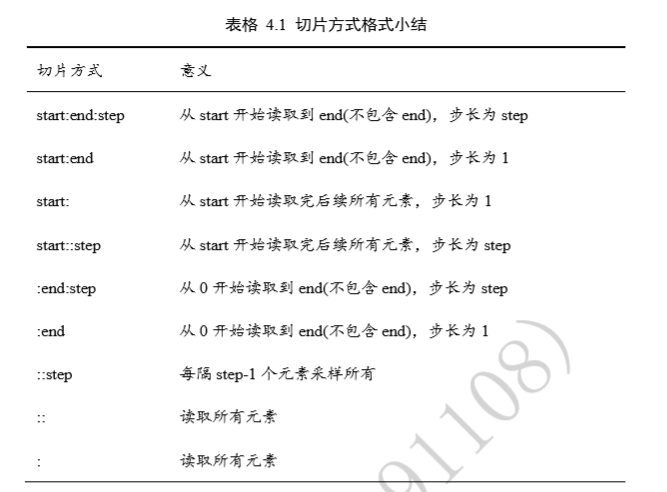 

　　特别地，step 可以为负数，考虑最特殊的一种例子，step = −1时，start:end:−1表示 从 start 开始，逆序读取至 end 结束(不包含 end)，索引号𝑒𝑛𝑑 ≤ 𝑠𝑡𝑎𝑟𝑡。考虑一 0~9 简单序 列，逆序取到第 1 号元素，不包含第 1 号：

In [65]:
x = tf.range(9) 
x[8:0:-1]

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([8, 7, 6, 5, 4, 3, 2, 1])>

In [66]:
L = x.numpy()
L[8:0:-1]

array([8, 7, 6, 5, 4, 3, 2, 1])

逆序取全部元素:

In [67]:
x[::-1]

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([8, 7, 6, 5, 4, 3, 2, 1, 0])>

逆序间隔采样： 

In [68]:
x[::-2]

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([8, 6, 4, 2, 0])>

读取每张图片的所有通道，其中行按着逆序隔行采样，列按着逆序隔行采样： 

In [69]:
x = tf.random.normal([4,32,32,3])
x[0,::-2,::-2] 

<tf.Tensor: shape=(16, 16, 3), dtype=float32, numpy=
array([[[-2.94424653e-01, -2.77280957e-01,  7.61732221e-01],
        [ 1.47944987e+00, -6.98718846e-01, -6.37587667e-01],
        [-7.59163201e-01,  9.30158973e-01, -3.47694665e-01],
        [ 7.44958460e-01,  1.07332408e+00,  5.26171863e-01],
        [-2.25850344e-01, -4.86870915e-01, -1.26465857e+00],
        [ 1.80393016e+00,  7.88783848e-01, -1.80155075e+00],
        [ 1.41855574e+00,  1.08350515e+00, -3.36873263e-01],
        [ 8.54424596e-01,  2.40400061e-01,  7.56666303e-01],
        [ 1.88312304e+00,  1.11078632e+00, -2.29820430e-01],
        [-7.91250408e-01, -1.35014236e+00,  2.83522427e-01],
        [ 4.46588606e-01, -1.23674572e+00,  1.60454488e+00],
        [ 5.89259803e-01, -1.40586764e-01, -2.39804482e+00],
        [ 1.84038237e-01,  5.05679727e-01,  2.26962042e+00],
        [ 4.03792292e-01, -7.05460489e-01, -3.25600475e-01],
        [-1.78760439e-01, -1.24025159e-01, -9.74371135e-01],
        [-7.22534895e-01, -2.938

　　当张量的维度数量较多时，不需要采样的维度一般用单冒号:表示采样所有元素，此时 有可能出现大量的:出现。继续考虑[4,32,32,3]的图片张量，当需要读取 G 通道上的数据 时，前面所有维度全部提取，此时需要写为： 

In [70]:
 x[:,:,:,1] 

<tf.Tensor: shape=(4, 32, 32), dtype=float32, numpy=
array([[[-0.2922276 ,  2.2367463 , -0.8562147 , ..., -0.15847331,
         -1.3885237 , -0.14882384],
        [ 0.36141267,  0.33768806, -0.8042599 , ..., -0.6896061 ,
          0.73380625,  0.95732576],
        [-1.0450696 ,  0.8306287 , -1.7376649 , ..., -0.3022045 ,
         -0.95755535, -0.7366611 ],
        ...,
        [ 0.6565496 , -0.76714206, -1.322185  , ...,  0.7358366 ,
         -0.6300016 , -1.4759591 ],
        [-0.2158239 , -1.4338721 ,  1.078119  , ..., -0.8924892 ,
          1.3763179 , -0.27649447],
        [ 0.4706852 , -0.2938211 , -0.37654823, ..., -0.69871885,
         -0.12951152, -0.27728096]],

       [[ 0.5176038 , -0.44638008,  0.7971883 , ...,  0.9546462 ,
          0.50592005, -1.060114  ],
        [ 0.5818755 , -0.27199173, -0.88921183, ...,  1.626226  ,
          0.30475897, -1.0468392 ],
        [-0.36343282,  1.2760391 , -1.1300696 , ..., -0.19985786,
         -1.6504598 ,  1.0984728 ],
        ...,
 

　　为了避免出现像𝑥[:,:,:,1]这样出现过多冒号的情况，可以使用⋯符号表示取多个维度 上所有的数据，其中维度的数量需根据规则自动推断：当切片方式出现⋯符号时，⋯符号 左边的维度将自动对齐到最左边，⋯符号右边的维度将自动对齐到最右边，此时系统再自 动推断⋯符号代表的维度数量，它的切片方式总结如表格 4.2：

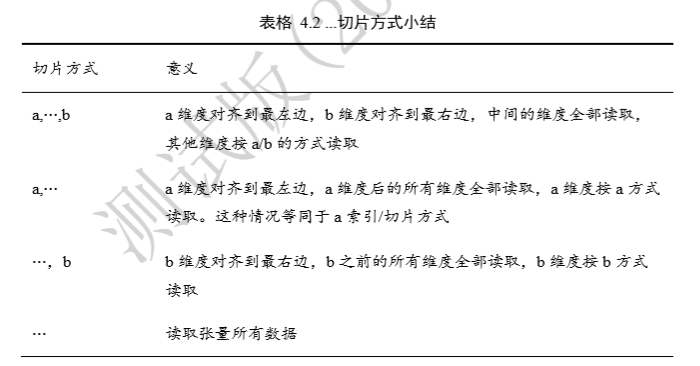


考虑如下例子：<br>
❑ 读取第 1-2 张图片的 G/B 通道数据

In [71]:
 x[0:2,...,1:] 

<tf.Tensor: shape=(2, 32, 32, 2), dtype=float32, numpy=
array([[[[-0.2922276 ,  1.6181244 ],
         [ 2.2367463 , -0.07474682],
         [-0.8562147 ,  1.0350404 ],
         ...,
         [-0.15847331, -0.12377911],
         [-1.3885237 , -0.14412625],
         [-0.14882384, -2.0851135 ]],

        [[ 0.36141267, -0.49191654],
         [ 0.33768806,  1.4791105 ],
         [-0.8042599 ,  0.44117403],
         ...,
         [-0.6896061 ,  1.3461063 ],
         [ 0.73380625, -1.1646024 ],
         [ 0.95732576,  0.44682547]],

        [[-1.0450696 ,  0.05606475],
         [ 0.8306287 ,  0.20817736],
         [-1.7376649 ,  0.12480574],
         ...,
         [-0.3022045 ,  1.0353504 ],
         [-0.95755535,  0.20158376],
         [-0.7366611 , -0.09855408]],

        ...,

        [[ 0.6565496 ,  1.3697573 ],
         [-0.76714206,  1.8925486 ],
         [-1.322185  , -0.27496132],
         ...,
         [ 0.7358366 , -1.4957577 ],
         [-0.6300016 ,  0.34291446],
         [-1.4759

❑ 读取最后 2 张图片

In [72]:
x[2:,...] 

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[ 2.021582  ,  1.1199539 , -1.9439284 ],
         [-1.4201173 ,  1.3066145 , -0.4596875 ],
         [ 0.32153317,  1.0273656 , -0.28500995],
         ...,
         [-0.41311112,  0.3933878 ,  0.35632965],
         [-0.16919783, -0.02566081, -0.8267885 ],
         [-0.25416833, -0.6972976 , -0.66202295]],

        [[ 1.7251892 ,  1.2545651 , -0.62556213],
         [-0.4301464 , -1.4573519 , -0.02938377],
         [-0.4391779 ,  0.24268827, -0.29708332],
         ...,
         [ 0.2922086 , -0.8684677 , -1.466687  ],
         [ 0.5544372 , -0.0605583 , -1.179615  ],
         [ 0.65399045,  0.8991594 ,  0.93226784]],

        [[-0.25210604,  2.167878  , -0.96846145],
         [ 1.4702955 , -0.5092933 , -0.43556947],
         [-1.8310031 , -0.36687303, -0.31303215],
         ...,
         [ 0.7405209 ,  0.94063747,  0.28467542],
         [-0.465467  ,  0.25636557,  0.25462088],
         [ 0.05398617,  1.0070333 ,  0.31251678]

读取 R/G 通道数据： 

In [73]:
x[...,:2]

<tf.Tensor: shape=(4, 32, 32, 2), dtype=float32, numpy=
array([[[[-1.7901502e+00, -2.9222760e-01],
         [-5.2389795e-01,  2.2367463e+00],
         [ 3.3433473e-01, -8.5621470e-01],
         ...,
         [ 4.5638062e-02, -1.5847331e-01],
         [ 2.0609233e-01, -1.3885237e+00],
         [-6.7877650e-01, -1.4882384e-01]],

        [[-5.7339445e-02,  3.6141267e-01],
         [-1.2684545e-01,  3.3768806e-01],
         [ 2.6700985e-01, -8.0425990e-01],
         ...,
         [-4.7979152e-01, -6.8960607e-01],
         [ 6.8665826e-01,  7.3380625e-01],
         [-2.6597950e-01,  9.5732576e-01]],

        [[-1.9909773e+00, -1.0450696e+00],
         [ 1.3857897e-01,  8.3062869e-01],
         [ 6.1134636e-01, -1.7376649e+00],
         ...,
         [-7.4334890e-01, -3.0220449e-01],
         [-1.2371876e+00, -9.5755535e-01],
         [ 1.1200340e+00, -7.3666108e-01]],

        ...,

        [[ 8.7952620e-01,  6.5654957e-01],
         [-1.4257469e+00, -7.6714206e-01],
         [ 9.3285722e-

### 小结 
　　张量的索引与切片方式多种多样，尤其是切片操作，初学者容易犯迷糊。但其实本质 上切片操作只有𝑠𝑡𝑎𝑟𝑡:𝑒𝑛𝑑:𝑠𝑡𝑒𝑝这一种基本形式，通过这种基本形式有目的地省略掉默认 参数，从而衍生出多种简写方法，这也是很好理解的。它衍生的简写形式熟练后一看就能 推测出省略掉的信息，书写起来也更方便快捷。由于深度学习一般处理的维度数在 4 维以 内，⋯操作符完全可以用:符号代替，因此理解了这些就会发现张量切片操作并不复杂。 

## 维度变换 
　　在神经网络运算过程中，维度变换是最核心的张量操作，通过维度变换可以将数据任 意地切换形式，满足不同场合的运算需求。<br> 　　
　　那么为什么需要维度变换呢？考虑线性层的批量形式：<br> 
  $$Y = X@W+ 𝒃 $$
其中 X 包含了 2 个样本，每个样本的特征长度为 4，X 的 shape 为[2,4]。线性层的输出为 3 个节点，即 W 的 shape 定义为[4,3]，偏置𝒃的 shape 定义为[3]。那么X@W的运算张量 shape 为[2,3]，需要叠加上 shape 为[3]的偏置𝒃。不同 shape 的 2 个张量怎么直接相加呢？<br> 
　　回到我们设计偏置的初衷，我们给每个层的每个输出节点添加一个偏置，这个偏置数 据是对所有的样本都是共享的，换言之，每个样本都应该累加上同样的偏置向量𝒃，如图 4.5 所示： 

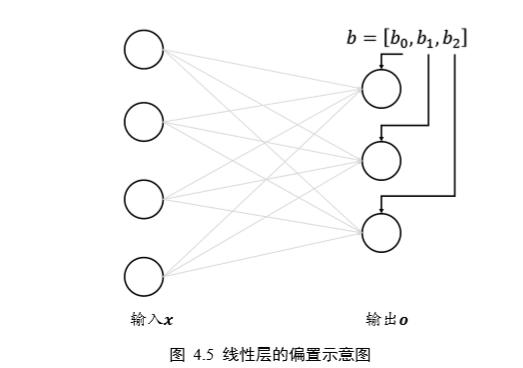

因此，对于 2 个样本的输入 X，我们需要将 shape 为[3]的偏置𝒃 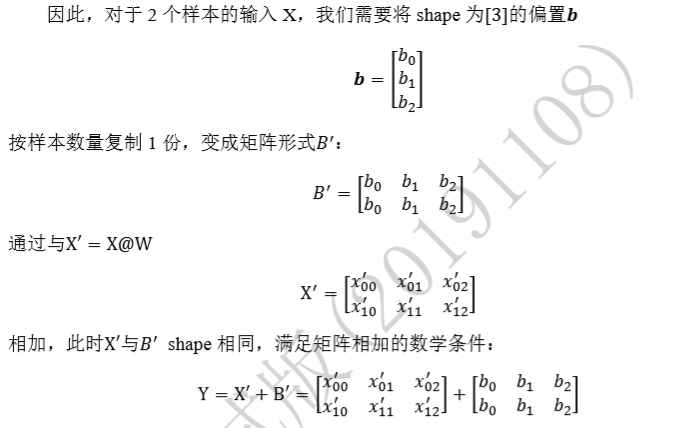
通过这种方式，既满足了数学上矩阵相加需要 shape 一致的条件，又达到了给每个输入样 本的输出节共享偏置的逻辑。为了实现这种运算方式，我们将𝒃插入一个新的维度，并把 它定义为 batch 维度，然后在 batch 维度将数据复制 1 份，得到变换后的B′，新的 shape 为 [2,3]。<br> 
　　算法的每个模块对于数据张量的格式有不同的逻辑要求，当现有的数据格式不满足算 法要求时，需要通过维度变换将数据调整为正确的格式。这就是维度变换的功能。<br>
　　基本的维度变换包含了改变视图 reshape，插入新维度 expand_dims，删除维度 squeeze，交换维度 transpose，复制数据 tile 等。 

### Reshape
　　在介绍改变视图操作之前，我们先来认识一下张量的存储和视图(View)的概念。张量 的视图就是我们理解张量的方式，比如 shape 为[2,4,4,3]的张量 A，我们从逻辑上可以理解 为 2 张图片，每张图片 4 行 4 列，每个位置有 RGB 3 个通道的数据；张量的存储体现在张 量在内存上保存为一段连续的内存区域，对于同样的存储，我们可以有不同的理解方式， 比如上述 A，我们可以在不改变张量的存储下，将张量 A 理解为 2 个样本，每个样本的特征为长度 48 的向量。这就是存储与视图的关系。<br>
　　我们通过 tf.range()模拟生成 x 的数据： 

In [74]:
x=tf.range(96) 
x=tf.reshape(x,[2,4,4,3])
x

<tf.Tensor: shape=(2, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]],


       [[[48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],

        [[60, 61, 62],
         [63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80],
         [81, 82, 83]],

        [[84, 85, 86],
         [87, 88, 89],
         [90, 91, 92],
         [93, 94, 95]]]])>

　　在存储数据时，内存并不支持这个维度层级概念，只能以平铺方式按序写入内存，因此这 种层级关系需要人为管理，也就是说，每个张量的存储顺序需要人为跟踪。为了方便表 达，我们把张量 shape 中相对靠左侧的维度叫做大维度，shape 中相对靠右侧的维度叫做小 维度，比如[2,4,4,3]的张量中，图片数量维度与通道数量相比，图片数量叫做大维度，通道 数叫做小维度。在优先写入小维度的设定下，上述张量的内存布局为 
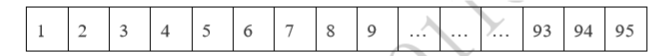
　　数据在创建时按着初始的维度顺序写入，改变张量的视图仅仅是改变了张量的理解方 式，并不会改变张量的存储顺序，这在一定程度上是从计算效率考虑的，大量数据的写入 操作会消耗较多的计算资源。改变视图操作在提供便捷性的同时，也会带来很多逻辑隐 患，这主要的原因是张量的视图与存储不同步造成的。我们先介绍合法的视图变换操作， 再介绍不合法的视图变换。<br>
　　比如张量按着初始视图[𝑏,ℎ, ,𝑐]写入的内存布局，我们改变初始视图[𝑏,ℎ, ,𝑐]的理解 方式，它可以有多种合法理解方式：<br> 
❑ [𝑏,ℎ ∗ ,𝑐] 张量理解为 b 张图片，h*w 个像素点，c 个通道 <br>
❑ [𝑏,ℎ, ∗ 𝑐] 张量理解为 b 张图片，h 行，每行的特征长度为 w*c <br>
❑ [𝑏,ℎ ∗ ∗ 𝑐] 张量理解为 b 张图片，每张图片的特征长度为 h*w*c <br>
从语法上来说，视图变换只需要满足新视图的元素总量与内存区域大小相等即可，即新视 图的元素数量等于 
$$𝑏 ∗ ℎ ∗ ∗ 𝑐$$ 
正是由于视图的设计约束很少，完全由用户定义，使得在改变视图时容易出现逻辑隐患。<br>
　　现在我们来考虑不合法的视图变换。例如，如果定义新视图为[𝑏, ,ℎ,𝑐]，[𝑏,𝑐,ℎ ∗ ] 或者[𝑏,𝑐,ℎ, ]等时，与张量的存储顺序相悖，如果不同步更新张量的存储顺序，那么恢复 出的数据将与新视图不一致，从而导致数据错乱。<br> 
　　为了能够正确恢复出数据，必须保证张量的存储顺序与新视图的维度顺序一致，例如 根据 图片数量 行 列 通道 初始视图保存的张量，按照 图片数量 行 列 通道 (𝑏 −ℎ − − 𝑐) 的顺序可以获得合法数据。如果按着 图片数量 像素 通道 ( − h ∗ w − c)的方式恢复视图， 也能得到合法的数据。但是如果按着 图片数量 通道 像素 ( − c −h ∗ w)的方式恢复数据， 由于内存布局是按着 图片数量 行 列 通道 的顺序，视图维度与存储维度顺序相悖，提取的数据将是错乱的。<br>
　　改变视图是神经网络中非常常见的操作，可以通过串联多个 Reshape 操作来实现复杂 逻辑，但是在通过 Reshape 改变视图时，必须始终记住张量的存储顺序，新视图的维度顺 序不能与存储顺序相悖，否则需要通过交换维度操作将存储顺序同步过来。举个例子，对 于 shape 为[4,32,32,3]的图片数据，通过 Reshape 操作将 shape 调整为[4,1024,3]，此时视图 的维度顺序为𝑏 − 𝑝𝑖𝑥𝑒𝑙 − 𝑐，张量的存储顺序为[𝑏,ℎ, ,𝑐]。可以将[4,1024,3]恢复为 <br>
❑  [𝑏,ℎ, ,𝑐] = [4,32,32,3]时，新视图的维度顺序与存储顺序无冲突，可以恢复出无逻辑 问题的数据 <br>
❑ [𝑏, ,ℎ,𝑐] = [4,32,32,3]时，新视图的维度顺序与存储顺序冲突 <br>
❑ [ℎ ∗ ∗ 𝑐,𝑏] = [3072,4]时，新视图的维度顺序与存储顺序冲突 在 TensorFlow 中，可以通过张量的 ndim 和 shape 成员属性获得张量的维度数和形 状： 

In [75]:
 x.ndim,x.shape 

(4, TensorShape([2, 4, 4, 3]))

通过 tf.reshape(x, new_shape)，可以将张量的视图任意的合法改变:

In [76]:
 tf.reshape(x,[2,-1]) 

<tf.Tensor: shape=(2, 48), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]])>

其中的参数-1 表示当前轴上长度需要根据视图总元素不变的法则自动推导，从而方便用户 书写。比如，上面的-1 可以推导为 
$$\frac{2 ∗ 4 ∗ 4 ∗ 3}{2} = 48 $$
再次改变数据的视图为[2,4,12]： 

In [77]:
tf.reshape(x,[2,4,12]) 

<tf.Tensor: shape=(2, 4, 12), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
        [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]],

       [[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71],
        [72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83],
        [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]]])>

再次改变数据的视图为[2,16,3]

In [78]:
tf.reshape(x,[2,-1,3])

<tf.Tensor: shape=(2, 16, 3), dtype=int32, numpy=
array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35],
        [36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47]],

       [[48, 49, 50],
        [51, 52, 53],
        [54, 55, 56],
        [57, 58, 59],
        [60, 61, 62],
        [63, 64, 65],
        [66, 67, 68],
        [69, 70, 71],
        [72, 73, 74],
        [75, 76, 77],
        [78, 79, 80],
        [81, 82, 83],
        [84, 85, 86],
        [87, 88, 89],
        [90, 91, 92],
        [93, 94, 95]]])>

通过上述的一系列连续变换视图操作时需要意识到，张量的存储顺序始终没有改变，数据 在内存中仍然是按着初始写入的顺序0,1,2,…,95保存的。 

### 增删维度 

**增加维度** 增加一个长度为 1 的维度相当于给原有的数据增加一个新维度的概念，维度 长度为 1，故数据并不需要改变，仅仅是改变数据的理解方式，因此它其实可以理解为改 变视图的一种特殊方式。<br>
考虑一个具体例子，一张 28x28 灰度图片的数据保存为 shape 为[28,28]的张量，在末 尾给张量增加一新维度，定义为为通道数维度，此时张量的 shape 变为[28,28,1]： 

In [8]:
x = tf.random.uniform([28,28],maxval=10,dtype=tf.int32)
x.shape

TensorShape([28, 28])

通过 tf.expand_dims(x, axis)可在指定的 axis 轴前可以插入一个新的维度

In [156]:
x = tf.expand_dims(x, axis=2)
x.shape

TensorShape([28, 28, 1])

可以看到，插入一个新维度后，数据的存储顺序并没有改变，依然按着 4,5,7,6,3,0,…的顺 序保存，仅仅是在插入一个新的维度后，改变了数据的视图。 <br>
　　同样的方法，我们可以在最前面插入一个新的维度，并命名为图片数量维度，长度为 1，此时张量的 shape 变为[1,28,28,1]。 

In [157]:
x = tf.expand_dims(x,axis=0)
x.shape

TensorShape([1, 28, 28, 1])

需要注意的是，tf.expand_dims 的 axis 为正时，表示在当前维度之前插入一个新维度；为负时，表示当前维度之后插入一个新的维度。以[𝑏,ℎ, ,𝑐]张量为例，不同 axis 参数的实际 插入位置如下图 4.6 所示：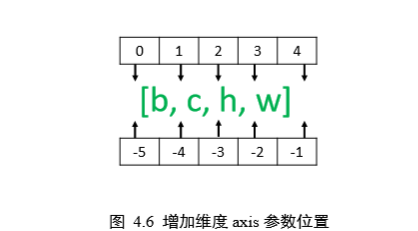 
**删除维度** 是增加维度的逆操作，与增加维度一样，删除维度只能删除长度为 1 的维 度，也不会改变张量的存储。继续考虑增加维度后 shape 为[1,28,28,1]的例子，如果希望将 图片数量维度删除，可以通过 tf.squeeze(x, axis)函数，axis 参数为待删除的维度的索引号， 图片数量的维度轴 axis=0： 

In [158]:
x = tf.squeeze(x, axis=0) 
x.shape

TensorShape([28, 28, 1])

继续删除通道数维度，由于已经删除了图片数量维度，此时的x的 shape 为[28,28,1]，因 此删除通道数维度时指定 axis=2： 

In [159]:
x = tf.squeeze(x, axis=2) 
x.shape

TensorShape([28, 28])

如果不指定维度参数axis，即tf.squeeze(x)，那么他会默认删除所有长度为1 的维度：

In [23]:
x = tf.random.uniform([1,28,28,1],minval=0,maxval=10,dtype=tf.int32)
x.shape

TensorShape([1, 28, 28, 1])

In [24]:
tf.squeeze(x).shape

TensorShape([28, 28])

### 交换维度
改变视图、增删维度都不会影响张量的存储。在实现算法逻辑时，在保持维度顺序不
变的条件下，仅仅改变张量的理解方式是不够的，有时需要直接调整的存储顺序，即交换
维度(Transpose)。通过交换维度，改变了张量的存储顺序，同时也改变了张量的视图。
交换维度操作是非常常见的，比如在TensorFlow 中，图片张量的默认存储格式是通道
后行格式：[𝑏, ℎ, , 𝑐]，但是部分库的图片格式是通道先行：[𝑏, 𝑐, ℎ, ]，因此需要完成
[𝑏, ℎ, , 𝑐]到[𝑏, 𝑐, ℎ, ]维度交换运算。我们以[𝑏, ℎ, , 𝑐]转换到[𝑏, 𝑐, ℎ, ]为例，介绍如何使
用tf.transpose(x, perm)函数完成维度交换操作，其中perm 表示新维度的顺序List。考虑图
片张量shape 为[2,32,32,3]，图片数量、行、列、通道数的维度索引分别为0,1,2,3，如果需
要交换为[𝑏, 𝑐, ℎ, ]格式，则新维度的排序为图片数量、通道数、行、列，对应的索引号为
[0,3,1,2]，实现如下：

In [33]:
x = tf.random.normal([2,32,32,3])
tf.transpose(x,perm=[0,3,1,2]).shape

TensorShape([2, 3, 32, 32])

如果希望将[𝑏, ℎ,w, 𝑐]交换为[𝑏,w, ℎ, 𝑐]，即将行列维度互换，则新维度索引为[0,2,1,3]:

In [30]:
x = tf.random.normal([2,32,32,3])
tf.transpose(x, perm=[0,2,1,3]).shape

TensorShape([2, 32, 32, 3])

需要注意的是，通过tf.transpose 完成维度交换后，张量的存储顺序已经改变，视图也随之
改变，后续的所有操作必须基于新的存续顺序进行。

### 数据复制
　　当通过增加维度操作插入新维度后，可能希望在新的维度上面复制若干份数据，满足
后续算法的格式要求。考虑𝑌 = 𝑋@𝑊 + 𝒃的例子，偏置𝒃插入新维度后，需要在新维度上
复制batch size 份数据，将shape 变为与𝑋@𝑊一致后，才能完成张量相加运算。可以通过
tf.tile(x, multiples)函数完成数据在指定维度上的复制操作，multiples 分别指定了每个维度上
面的复制倍数，对应位置为1 表明不复制，为2 表明新长度为原来的长度的2 倍，即数据
复制一份，以此类推。
以输入为[2,4]，输出为3 个节点线性变换层为例，偏置𝒃定义为：
 $$
 b = \begin{bmatrix}
 b_0\\
 b_1\\
 b_2\\
 \end{bmatrix}
 $$
 通过 tf.expand_dims(b,axis=0)插入新维度：样本数量维度
 $$
 b = \begin{bmatrix}
 \begin{bmatrix}
 b_0&b_1&b_2\\
 \end{bmatrix}
 \end{bmatrix}
 $$
此时𝒃的shape 变为[1,3]，我们需要在axis=0 图片数量维度上根据输入样本的数量复制若
干次，这里的batch size 为2，𝒃变为矩阵B：
 $$
 b = \begin{bmatrix}
 b_0&b_1&b_2\\
 b_0&b_1&b_2\\
 \end{bmatrix}
 $$
　　通过 tf.tile(b, multiples=[2,1])即可在axis=0 维度复制1 次，在axis=1 维度不复制。首
先插入新的维度：

In [51]:
b = tf.constant([1,2])
print(b)
b = tf.expand_dims(b, axis=0)
b

tf.Tensor([1 2], shape=(2,), dtype=int32)


<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[1, 2]])>

在batch 维度上复制数据1 份：

In [52]:
b = tf.tile(b, multiples=[2,1])
b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [1, 2]])>

考虑另一个例子，输入x 为2 行2 列的矩阵：

In [64]:
x = tf.range(4)
print(x)
x=tf.reshape(x,[2,2])
x

tf.Tensor([0 1 2 3], shape=(4,), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3]])>

首先在列维度复制1 份数据：

In [65]:
x = tf.tile(x, multiples=[1,2])
x

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3]])>

然后在行维度复制1 份数据：

In [66]:
x = tf.tile(x,multiples=[2,1])
x

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3],
       [0, 1, 0, 1],
       [2, 3, 2, 3]])>

经过2 个维度上的复制运算后，可以看到数据的变化过程，shape 也变为原来的2 倍。<br>
　　需要注意的是，tf.tile 会创建一个新的张量来保存复制后的张量，由于复制操作涉及到
大量数据的读写IO 运算，计算代价相对较高。神经网络中不同shape 之间的运算操作十分
频繁，那么有没有轻量级的复制操作呢？这就是接下来要介绍的Broadcasting 操作。

## Broadcasting
　　Broadcasting 也叫广播机制(自动扩展也许更合适)，它是一种轻量级张量复制的手段，
在逻辑上扩展张量数据的形状，但是只要在需要时才会执行实际存储复制操作。对于大部
分场景，Broadcasting 机制都能通过优化手段避免实际复制数据而完成逻辑运算，从而相对
于tf.tile 函数，减少了大量计算代价。<br>
　　对于所有长度为1 的维度，Broadcasting 的效果和tf.tile 一样，都能在此维度上逻辑复
制数据若干份，区别在于tf.tile 会创建一个新的张量，执行复制IO 操作，并保存复制后的
张量数据，Broadcasting 并不会立即复制数据，它会逻辑上改变张量的形状，使得视图上变
成了复制后的形状。Broadcasting 会通过深度学习框架的优化手段避免实际复制数据而完成
逻辑运算，至于怎么实现的用户不必关心，对于用户来说，Broadcasting 和tf.tile 复制的最
终效果是一样的，操作对用户透明，但是Broadcasting 机制节省了大量计算资源，建议在
运算过程中尽可能地利用Broadcasting 提高计算效率。<br>
　　继续考虑上述的Y = X@W + 𝒃的例子，X@W的shape 为[2,3]，𝒃的shape 为[3]，我们
可以通过结合tf.expand_dims 和tf.tile 完成实际复制数据运算，将𝒃变换为[2,3]，然后与
X@W完成相加。但实际上，我们直接将shape 为[2,3]与[3]的𝒃相加：

In [ ]:
x = tf.random.normal([2,4])
w = tf.random.normal([4,3])
b = tf.random.normal([3])
y = x@w+b

上述加法并没有发生逻辑错误，那么它是怎么实现的呢？这是因为它自动调用Broadcasting
函数tf.broadcast_to(x, new_shape)，将2 者shape 扩张为相同的[2,3]，即上式可以等效为：<br>
y = x@w + tf.broadcast_to(b,[2,3])<br>
也就是说，操作符+在遇到shape 不一致的2 个张量时，会自动考虑将2 个张量
Broadcasting 到一致的shape，然后再调用tf.add 完成张量相加运算，这也就解释了我们之
前一直存在的困惑。通过自动调用tf.broadcast_to(b, [2,3])的Broadcasting 机制，既实现了
增加维度、复制数据的目的，又避免实际复制数据的昂贵计算代价，同时书写更加简洁高
效。<br>
那么有了Broadcasting 机制后，所有shape 不一致的张量是不是都可以直接完成运
算？很明显，所有的运算都需要在正确逻辑下进行，Broadcasting 机制并不会扰乱正常的计
算逻辑，它只会针对于最常见的场景自动完成增加维度并复制数据的功能，提高开发效率
和运行效率。这种最常见的场景是什么呢？这就要说到Broadcasting 设计的核心思想。<br>
　　Broadcasting 机制的核心思想是普适性，即同一份数据能普遍适合于其他位置。在验证
普适性之前，需要将张量shape 靠右对齐，然后进行普适性判断：对于长度为1 的维度，
默认这个数据普遍适合于当前维度的其他位置；对于不存在的维度，则在增加新维度后默
认当前数据也是普适性于新维度的，从而可以扩展为更多维度数、其他长度的张量形状。<br>
　　考虑 shape 为[w, 1]的张量A，需要扩展为shape：[𝑏, ℎ,w, 𝑐]，如图 4.7 所示，上行为
欲扩展的shape，下面为现有shape：
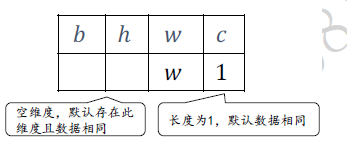
$$图 4.7 Broadcasting 实例$$
首先将2 个shape 靠右对齐，对于通道维度c，张量的现长度为1，则默认此数据同样适合
当前维度的其他位置，将数据逻辑上复制𝑐 − 1份，长度变为c；对于不存在的b 和h 维
度，则自动插入新维度，新维度长度为1，同时默认当前的数据普适于新维度的其他位
置，即对于其它的图片、其他的行来说，与当前的这一行的数据完全一致。这样将数据
b，h 维度的长度自动扩展为b，h，如图 4.8 所示：

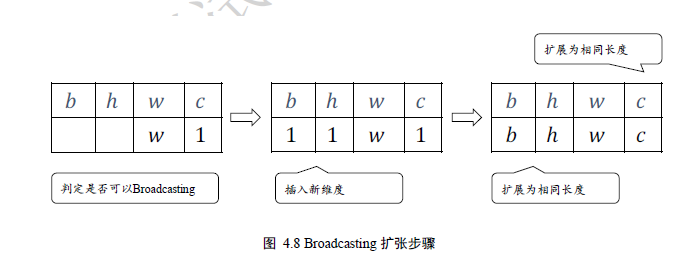
通过 tf.broadcast_to(x, new_shape)可以显式将现有shape 扩张为new_shape：

In [68]:
A = tf.random.normal([32,1])
tf.broadcast_to(A, [2,32,32,3]).shape

TensorShape([2, 32, 32, 3])

可以看到，在普适性原则的指导下，Broadcasting 机制变得直观好理解，它的设计是非常符
合人的思维模式。<br>
　　我们来考虑不满足普适性原则的例子，如下图 4.9 所示：
  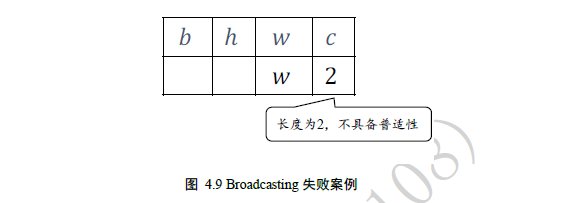
在 c 维度上，张量已经有2 个特征数据，新shape 对应维度长度为c(𝑐 ≠ 2，比如c=3)，那
么当前维度上的这2 个特征无法普适到其他长度，故不满足普适性原则，无法应用
Broadcasting 机制，将会触发错误：

In [79]:
A = tf.random.normal([32,2])
tf.broadcast_to(A, [2,32,32,3])

InvalidArgumentError: Incompatible shapes: [32,2] vs. [2,32,32,3] [Op:BroadcastTo]

　　在进行张量运算时，有些运算可以在处理不同shape 的张量时，会隐式自动调用
Broadcasting 机制，如+，-，*，/等运算等，将参与运算的张量Broadcasting 成一个公共
shape，再进行相应的计算，如图 4.10 所示，演示了3 种不同shape 下的张量A，B 相加的
例子：
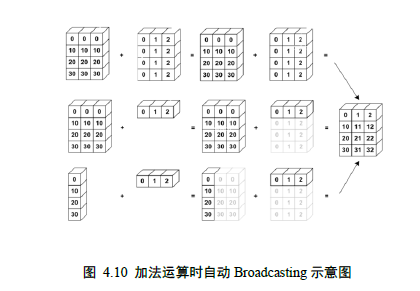
简单测试一下基本运算符的自动Broadcasting 机制：

In [82]:
a = tf.random.normal([2,32,32,1])
b = tf.random.normal([32,32])
a+b,a-b,a*b,a/b

(<tf.Tensor: shape=(2, 32, 32, 32), dtype=float32, numpy=
 array([[[[-3.4874177e-01,  1.0598621e+00,  4.1779590e-01, ...,
           -1.1542448e+00,  9.2409641e-01,  8.2357872e-01],
          [-4.0358931e-01,  1.5732412e+00,  3.0437350e+00, ...,
            1.0044312e+00,  1.6861081e+00,  2.2298710e+00],
          [ 1.2583417e-01,  5.6496185e-01,  9.7213566e-01, ...,
            3.6210269e-01, -1.7221642e-01, -1.2313095e+00],
          ...,
          [ 5.4600608e-01, -9.9930853e-02, -4.9544007e-01, ...,
           -1.2853296e+00, -7.4104488e-01, -3.6829114e-02],
          [ 3.9839702e+00,  2.9529941e+00,  4.0892568e+00, ...,
            2.5625625e+00,  3.2994936e+00,  2.1428893e+00],
          [-9.7188783e-01,  8.9444673e-01, -1.4365837e-01, ...,
           -6.8907690e-01,  1.0477409e+00, -2.1512880e+00]],
 
         [[-4.1460747e-01,  9.9399644e-01,  3.5193020e-01, ...,
           -1.2201104e+00,  8.5823071e-01,  7.5771302e-01],
          [ 3.4668183e-01,  2.3235123e+00,  3.7940061e+0

这些运算都能Broadcasting 成[2,32,32,32]的公共shape，再进行运算。熟练掌握并运用
Broadcasting 机制可以让代码更简洁，计算效率更高。

## 数学运算
　　前面的章节我们已经使用了基本的加减乘除等数学运算函数，本节我们将系统地介绍
TensorFlow 中常见的数学运算函数。
### 加减乘除
　　加减乘除是最基本的数学运算，分别通过tf.add, tf.subtract, tf.multiply, tf.divide 函数实
现，TensorFlow 已经重载了+ −∗/运算符，一般推荐直接使用运算符来完成加减乘除运
算。<br>
　　整除和余除也是常见的运算之一，分别通过//和%运算符实现。我们来演示整除运
算：<br>

In [85]:
a = tf.range(5)
b = tf.constant(2)
a//b

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 1, 1, 2])>

余除运算：

In [86]:
a%b

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 0, 1, 0])>

### 乘方
　　通过 tf.pow(x, a)可以方便地完成𝑦 = 𝑥𝑎乘方运算，也可以通过运算符**实现𝑥 ∗∗ 𝑎运
算，实现如下：

In [87]:
x = tf.range(4)
tf.pow(x,3)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  1,  8, 27])>

In [88]:
x**2

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>

设置指数为 $\frac{1}{a}$
形式即可实现根号运算：$\sqrt[a]{x}$

In [90]:
x=tf.constant([1.,4.,9.])
x**(0.5)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

特别地，对于常见的平方和平方根运算，可以使用tf.square(x)和tf.sqrt(x)实现。平方运算
实现如下：

In [94]:
x = tf.range(5)
x = tf.cast(x, dtype=tf.float32)
x = tf.square(x)
x

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 0.,  1.,  4.,  9., 16.], dtype=float32)>

平方根运算实现如下：

In [93]:
tf.sqrt(x)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 2., 3., 4.], dtype=float32)>

###  指数、
　　通过 tf.pow(a, x)或者**运算符可以方便实现指数运算𝑎𝑥：

In [95]:
x = tf.constant([1.,2.,3.])
2**x

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 4., 8.], dtype=float32)>

In [ ]:
特别地，对于自然指数𝑒𝑥,可以通过tf.exp(x)实现

In [ ]:
tf.exp(1.)

在 TensorFlow 中，自然对数$log_e x$可以通过tf.math.log(x)实现:

In [97]:
x=tf.exp(3.)
tf.math.log(x)

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

如果希望计算其他底数的对数，可以根据对数的换底公式：
$$ log_a = \frac{log_a x}{log_e x}$$
间接的通过tf.math.log(x)实现。如计算$log_10 x$可以通过$\frac{log_e x}{log_e10}$
实现如下：

In [103]:
x = tf.constant([1.,2.])
x = 10**x
tf.math.log(x)/tf.math.log(10.)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

实现起来相对繁琐，也许TensorFlow 以后会推出任意底数的log 函数。

### 矩阵相乘
　　神经网络中间包含了大量的矩阵相乘运算，前面我们已经介绍了通过@运算符可以方
便的实现矩阵相乘，还可以通过tf.matmul(a, b)实现。需要注意的是，TensorFlow 中的矩阵
相乘可以使用批量方式，也就是张量a,b 的维度数可以大于2。当张量a,b 维度数大于2
时，TensorFlow 会选择a,b 的最后两个维度进行矩阵相乘，前面所有的维度都视作Batch 维
度。<br>
　　根据矩阵相乘的定义，a 和b 能够矩阵相乘的条件是，a 的倒数第一个维度长度(列)和
b 的倒数第二个维度长度(行)必须相等。比如张量a shape:[4,3,28,32]可以与张量b
shape:[4,3,32,2]进行矩阵相乘：

In [117]:
a = tf.random.normal([4,3,23,32])
b = tf.random.normal([4,3,32,2])
a@b

<tf.Tensor: shape=(4, 3, 23, 2), dtype=float32, numpy=
array([[[[  6.3873253 ,   0.5623207 ],
         [  5.4090843 ,   2.11242   ],
         [ -2.054392  ,   2.342437  ],
         [ -2.3284755 ,  -0.11184013],
         [  0.528434  ,   2.6329598 ],
         [  1.4028493 ,   7.9578104 ],
         [  1.6839097 ,  -6.9428396 ],
         [ -0.319592  ,   3.5472088 ],
         [ -3.4801874 ,   0.42014122],
         [  1.1963489 ,  12.268469  ],
         [  4.556288  ,  -2.3908906 ],
         [  6.3959785 ,  -7.284949  ],
         [ -5.6199493 ,  -4.8915915 ],
         [ -2.7181144 ,  -6.6922264 ],
         [ -6.354023  , -10.671074  ],
         [ -8.330126  ,  -4.5377545 ],
         [ -4.737864  ,  13.1278105 ],
         [  3.563609  , -11.440495  ],
         [  0.66589665,   6.0719304 ],
         [ -0.87059426,   7.159829  ],
         [  1.554718  ,   8.353736  ],
         [ -7.0379767 ,   2.8804898 ],
         [ -0.3746758 ,  -5.4725056 ]],

        [[ -4.6365786 ,  -1.5174809 ],
       

In [118]:
a.numpy().dot(b.numpy())

array([[[[[[ 6.38732529e+00,  5.62321126e-01],
           [ 9.87156963e+00,  1.90783000e+00],
           [-4.54982615e+00, -2.80093122e+00]],

          [[-2.19053462e-01,  8.85947883e-01],
           [-2.80974436e+00,  9.35088694e-01],
           [ 1.07557392e+01, -6.92468524e-01]],

          [[ 3.47694516e+00,  5.30383825e-01],
           [ 1.12640533e+01,  7.60767174e+00],
           [ 1.13247132e+00,  1.29435933e+00]],

          [[-6.66548681e+00, -1.84927499e+00],
           [ 2.37584519e+00,  4.60856867e+00],
           [ 3.48334408e+00, -4.50630379e+00]]],


         [[[ 5.40908480e+00,  2.11241984e+00],
           [ 4.19447333e-01,  5.02086115e+00],
           [-4.64482975e+00, -7.48784494e+00]],

          [[-5.94840670e+00,  4.12870264e+00],
           [-2.76243472e+00,  4.89399290e+00],
           [ 3.25066328e+00,  9.19460297e+00]],

          [[ 8.63569498e-01,  1.20477800e+01],
           [ 3.64360690e+00, -8.14009380e+00],
           [ 1.48502171e+00,  8.65861893e+00]]

得到 shape 为[4,3,28,2]的结果。
　　矩阵相乘函数支持自动Broadcasting 机制：

In [119]:
tf.matmul(a,b)

<tf.Tensor: shape=(4, 3, 23, 2), dtype=float32, numpy=
array([[[[  6.3873253 ,   0.5623207 ],
         [  5.4090843 ,   2.11242   ],
         [ -2.054392  ,   2.342437  ],
         [ -2.3284755 ,  -0.11184013],
         [  0.528434  ,   2.6329598 ],
         [  1.4028493 ,   7.9578104 ],
         [  1.6839097 ,  -6.9428396 ],
         [ -0.319592  ,   3.5472088 ],
         [ -3.4801874 ,   0.42014122],
         [  1.1963489 ,  12.268469  ],
         [  4.556288  ,  -2.3908906 ],
         [  6.3959785 ,  -7.284949  ],
         [ -5.6199493 ,  -4.8915915 ],
         [ -2.7181144 ,  -6.6922264 ],
         [ -6.354023  , -10.671074  ],
         [ -8.330126  ,  -4.5377545 ],
         [ -4.737864  ,  13.1278105 ],
         [  3.563609  , -11.440495  ],
         [  0.66589665,   6.0719304 ],
         [ -0.87059426,   7.159829  ],
         [  1.554718  ,   8.353736  ],
         [ -7.0379767 ,   2.8804898 ],
         [ -0.3746758 ,  -5.4725056 ]],

        [[ -4.6365786 ,  -1.5174809 ],
       

In [121]:
a = tf.random.normal([4,28,32])
b = tf.random.normal([32,16])
tf.matmul(a,b).shape

TensorShape([4, 28, 16])

## 前向传播实战
　　到现在为止，我们已经介绍了如何创建张量，对张量进行索引切片，维度变换和常见
的数学运算等操作。本节我们将利用我们已经学到的知识去完成三层神经网络的实现：
$$o𝑢𝑡 = 𝑟𝑒𝑙𝑢{𝑟𝑒𝑙𝑢{𝑟𝑒𝑙𝑢[𝑋@𝑊1 + 𝑏1]@𝑊2 + 𝑏2}@𝑊 + 𝑏 }$$
我们采用的数据集是MNIST 手写数字图片集，输入节点数为784，第一层的输出节点数是
256，第二层的输出节点数是128，第三层的输出节点是10，也就是当前样本属于10 类别
的概率。<br>
　　首先创建每个非线性函数的w,b 参数张量：

In [131]:
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))

在前向计算时，首先将shape 为[𝑏, 28,28]的输入数据Reshape 为[𝑏, 784]:

In [228]:
# [b, 28, 28] => [b, 28*28]
from tensorflow.keras import datasets
import os 
mnist_path = os.path.join(os.getcwd(),'data/mnist.npz')
(x,y),_= datasets.mnist.load_data(path=mnist_path)
x.shape, y.shape
x=tf.convert_to_tensor(x,dtype=tf.float32) / 255.
y=tf.convert_to_tensor(y,dtype=tf.int32)
print(x.shape)
x = tf.reshape(x, [-1, 28*28])
x.shape

(60000, 28, 28)


TensorShape([60000, 784])

完成第一个非线性函数的计算，我们这里显示地进行Broadcasting:

In [219]:
# [b, 784]@[784, 256] + [256] => [b, 256] + [256] => [b, 256] + [b, 256]
h1 = x@w1 + tf.broadcast_to(b1, [x.shape[0], 256])
h1 = tf.nn.relu(h1)
h1.shape

TensorShape([60000, 256])

同样的方法完成第二个和第三个非线性函数的前向计算，输出层可以不使用ReLU 激活函
数：

In [220]:
# [b, 256] => [b, 128]
h2 = h1@w2 + b2
print(h2.shape)
h2 = tf.nn.relu(h2)
# [b, 128] => [b, 10]
out = h2@w3 + b3
out.shape

(60000, 128)


TensorShape([60000, 10])

将真实的标注张量y 转变为one-hot 编码，并计算与out 的均方差：

In [229]:
# mse = mean(sum(y-out)^2)
# [b, 10]
y_onehot = tf.one_hot(y, depth=10)
loss = tf.square(y_onehot - out)
# mean: scalar
loss = tf.reduce_mean(loss)

上述的前向计算过程都需要包裹在with tf.GradientTape() as tape 上下文中，使得前向计算时
能够保存计算图信息，方便反向求导运算。<br>
　　通过 tape.gradient()函数求得网络参数到梯度信息:

按照：
$$ 𝜃′ = 𝜃 - 𝜂 ∗ \frac{𝜕ℒ}{𝜕𝜃} $$
来更新网络参数

In [242]:
train_db = tf.data.Dataset.from_tensor_slices((x,y)).batch(128)
train_iter = iter(train_db)   #迭代器
sample = next(train_iter)
print("batch: ", sample[0].shape, sample[1].shape)

#创建权值，完成前向传播
#[batch,784] => [b, 256] => [b, 128] => [b, 10]
#w: [dim_in, dim_out]
#b: [dim_out]
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))#原来均值为0，方差维为1,现在方差变为0.1
b1 = tf.Variable(tf.zeros([256]))
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))
# compute gradients
lr = 1e-3

#前向运算


for epoch in range(10):         #iterate 迭代整个数据集10次。
    # 外层for: 对所有的图片做循环。
    #for (x, y) in train_db:
    for step, (x, y) in enumerate(train_db):  #迭代for every batch
        #x: [128, 28, 28]
        #y: [128]

        #维度变换; [b, 28, 28]-> [b, 28*28]
        x = tf.reshape(x, [-1, 28*28])
        #x: [b, 28*28]
        #h1 = x@w1 + b1
        #[b, 784]@[784, 256] + [256] = [b, 256] + [256] => [b, 256] + [b, 256]

        #使用tensorflow自动求导的过程,其中: w,b。tf.GradientTape()参与梯度计算的代码放到这里面。
        with tf.GradientTape() as tape:
            #GradientTape里面默认只会跟踪tf.Variable()类型。如果类型不是这个的话。这里为tf.tensor,tf.Variable是tf.tensor的一种特殊类型。
            #因此简单的包装一下。

            h1 = x@w1 + tf.broadcast_to(b1, [x.shape[0], 256]) #直接自动广播机制，也可以手动
            h1=tf.nn.relu(h1)
            #[b, 256] -> [b, 128]
            h2 = h1@w2 + b2
            h2=tf.nn.relu(h2)
            #[b, 128] -> [b, 10]
            out = h2@w3 + b3  #得到前向输出结果。

            #computer loss: 计算误差均方差。
            # out维度: [b, 10]
            # 真实的y:  [b],维度这里需要把y变成一个one-hot 编码
            y_onehot = tf.one_hot(y, depth=10)

            #mse = mean((y_onehot-out)^2)
            #shape : [b, 10]
            loss = tf.square(y_onehot - out)

            #mean: scalar
            #loss = tf.reduce_mean(loss) / b / 10 一般来说除以一个b就够了，每个batch上的一个均值。取决于怎么理解，都是可以的。
            loss = tf.reduce_mean(loss) #这里相当于一个放缩，正向放缩不会影响梯度的方向。没有影响的。
            #loss = tf._reduce_mean(tf.reduce_sum(loss,axis=1))#,我自己的理解。

        #得到一个梯度。需要求解梯度的有哪些呢？
             #print(grads)  #结果：[None, None, None, None, None, None]
        # w1 = w1 - lr* w1_grad, 这里为了细节，手写。实际可以不用手写。

             #b1 = b1 - lr * grads[1]
        #w2 = w2 - lr * grads[2]
        #b2 = b2 - lr * grads[3]
        #w3 = w3 - lr * grads[4]
        #b3 = b3 - lr * grads[5]   #第一for增加一个step
        #w1 = w1 - lr * grads[0]            #这 里两个w1为两个对象。原来的w1减去这个值赋值给一个新的对象.w1原来是
                                            #tf.Variable,更新一次之后新的w1变为tf.Tensor类型了。新一次操作之后就会错误。
        w1.assign_sub(lr * grads[0])       #原地更新,数据类型保持不变
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])

        # print(isinstance(b3,tf.Variable))
        # print(isinstance(b3,tf.Tensor))
        #每100论，看一下loss信息。
        if step % 100 == 0:
            print(epoch, step, 'loss:', float(loss))

batch:  (96, 784) (96,)
0 0 loss: 0.4310322701931
1 0 loss: 0.4309406280517578
2 0 loss: 0.4308541715145111
3 0 loss: 0.43077337741851807
4 0 loss: 0.4306982159614563
5 0 loss: 0.4306281507015228
6 0 loss: 0.4305642545223236
7 0 loss: 0.4305051565170288
8 0 loss: 0.43045130372047424
9 0 loss: 0.43040287494659424


其中assign_sub()将原地(In-place)减去给定的参数值，实现参数的自我更新操作。网络训练
误差值的变化曲线如图 4.11 所示。
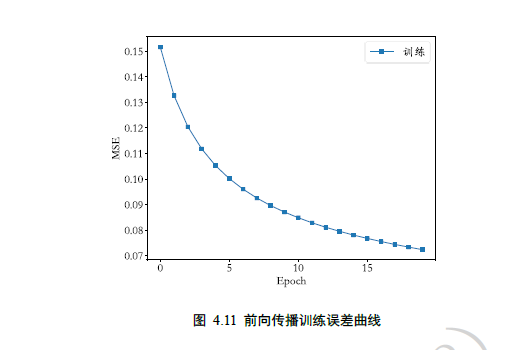